# Note



### 1. 일간 vs 주간

### 2. 초깃값 설정
지금은 $ E[\theta_t] + \sigma[\theta_t]$

### 3. EWMA
   $\text{weight} = \frac{2}{ \text{window} + 2 }$
   
### 4. threshold

+ Volume bar 에서 $P[b_t = 1]$ 도 EWMA 를 적용해야하는가?
+ Jupyter에서 Multi Processing이 아예 안되는가?

### TODO
1. $b_t$ 는 batch 연산 가능
2. 데이터를 다 numpy 데이터로 변환해서 처리 후 Dataframe으로



In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from bars import TIB,VIB,DIB

from tqdm import tqdm

import multiprocessing as mp

In [2]:
path = 'MiniKospi/'
list_file = os.listdir(path)
list_file.sort()
data = pd.DataFrame(columns=['close','volume']) 
data.index.names = ['timestamp']
cnt=0
for file in tqdm(list_file) :
    tmp = pd.read_csv(path+file,index_col=0)
    tmp = tmp.drop(columns=['date','time','sell','buy'])
    tmp.index = pd.to_datetime(tmp.index)
    tmp.index.names = ['timestamp']
    data = data.append(tmp)
    cnt+=1
    if cnt > 1: break;
weekly = [g for n, g in data.groupby(pd.Grouper(level='timestamp', freq='D'))]


  9%|███████▌                                                                           | 1/11 [00:04<00:47,  4.71s/it]


```python
def TIB(weekly_data,threshold=5000,index='timestamp',column='close'): 
def VIB(weekly_data,threshold=20000,index='timestamp',col_price='close',col_volume='volume'):
def DIB(weekly_data,threshold=200000,index='timestamp',col_price='close',col_volume='volume'):        
```

In [3]:
tick = TIB(weekly)
volume = VIB(weekly)
dollar = DIB(weekly)

TIB start
3203.60898541634
1891.8271904361247
3203.60898541634 0.7578014740473576
3202.971578137109 0.7577491412111247
3202.4693481758172 0.757706045669295
VIB start
19294.080736394408 3.36192567037792 4.653442057393759
19290.32047361359 0.000559304332623081 0.0010922409519647173
19287.3578204621 0.00034273995377473443 0.0007296655519237568
DIB start
1030012.2730892131 147.8848988552611 147.8848988552611


  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

1029807.4148971938 0.29294899841279215 0.29294899841279215


 50%|██████████████████████████████████████████                                          | 1/2 [00:14<00:14, 14.94s/it]

1029646.0018960339 0.19473716947685724 0.19473716947685724


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:33<00:00, 16.08s/it]


In [4]:
#tick.to_csv('tick_t5K_full.csv')
#volume.to_csv('volume_t20K_full.csv')'''
#dollar.to_csv('dib_t6M_d35.csv')

In [5]:
#tick = pd.read_csv('tick_t5K_full.csv',index_col = 'timestamp')
#volume = pd.read_csv('volume_t20K_full.csv',index_col = 'timestamp')
#dollar = pd.read_csv('dollar_t6M_full.csv',index_col = 'timestamp')

In [6]:
print('size of tick ' + str(tick.index.size))
print('size of volume ' + str(volume.index.size))
print('size of dollar ' + str(dollar.index.size))

size of tick 0
size of volume 791
size of dollar 791


### Time bar

In [7]:
logic_time = {
    'close'  : 'last'
    }
time_bar = data.resample('H').apply(logic_time)
display(time_bar.index.size)

871

### close dist

C:\Python37\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Python37\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


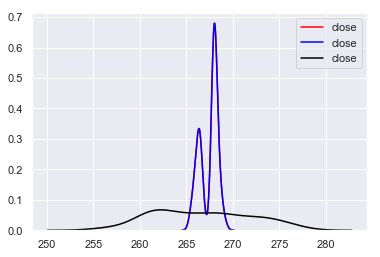

In [8]:
fig, ax = plt.subplots()
sns.kdeplot(tick['close'], color="green")
sns.kdeplot(volume['close'],  color="red")
sns.kdeplot(dollar['close'], color="blue")
sns.kdeplot(time_bar['close'], color="black")
plt.show()

### Distribution of imbalance bars

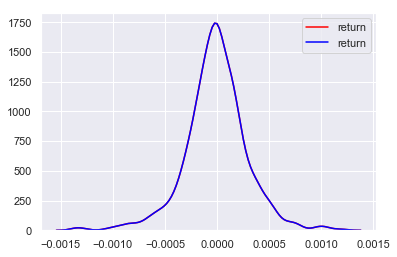

In [9]:
tick['return'] = tick['close'].pct_change()
volume['return'] = volume['close'].pct_change()
dollar['return'] = dollar['close'].pct_change()

time_bar['return'] = time_bar['close'].pct_change()

tick = tick.dropna()
volume = volume.dropna()
dollar = dollar.dropna()
time_bar = time_bar.dropna()

fig, ax = plt.subplots()
sns.kdeplot(tick['return'], color="green")
sns.kdeplot(volume['return'],  color="red")
sns.kdeplot(dollar['return'], color="blue")
#sns.kdeplot(time_bar['return'], color="black")
plt.show()

C:\Python37\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


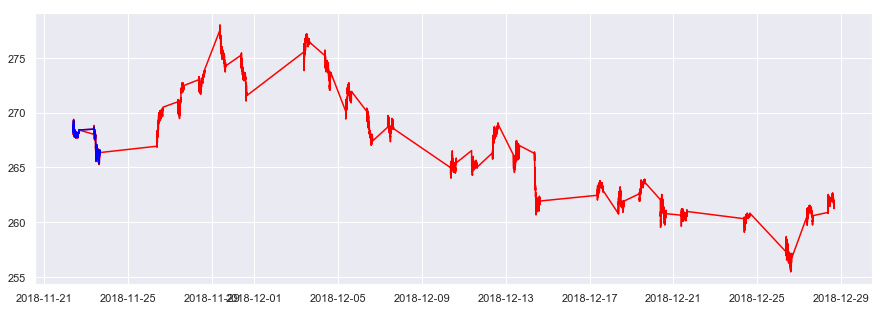

In [10]:
 fig, ax1 = plt.subplots()

#plt.plot(data_day.index, data_day['close'],color='#ff0000')
plt.plot(data.index, data['close'],color='#ff0000')
# df_corr = data_day[data_day.columns[0]]
# print(df_corr.autocorr)

''' ax2 = ax2.bar(tick_temp.index, tick_temp['dummy'],color='#5d8c70')'''
#ax2 = ax2.plot(tick.index, tick['close'],color='#5d8c70')
plt.plot(tick.index, tick['close'],color='green')

plt.plot(volume.index, volume['close'],color='red')
plt.plot(dollar.index, volume['close'],color='blue')

fig.set_figwidth(15)
fig.set_figheight(5)
plt.show()

### Auto Correlation

In [11]:
display(time_bar['return'].autocorr(lag=1))
display(tick['return'].autocorr(lag=1))
display(volume['return'].autocorr(lag=1))
display(dollar['return'].autocorr(lag=1))

display(time_bar['close'].autocorr(lag=1))
display(tick['close'].autocorr(lag=1))
display(volume['close'].autocorr(lag=1))
display(dollar['close'].autocorr(lag=1))

-0.00015682505623154509

nan

-0.013113158135671684

-0.013113158135671684

0.981152272658946

nan

0.9965749628169303

0.9965749628169303

# num of imbalance bar 

In [12]:
tick['dummy'] = 1
volume['dummy'] = 1
dollar['dummy'] = 1
logic_count = {
    'dummy'  : 'sum'
    }

tick_temp = tick.resample ('W' ).apply(logic_count)
volume_temp = volume.resample ('W' ).apply(logic_count)
dollar_temp = dollar.resample ('W' ).apply(logic_count)

fig, ax1 = plt.subplots()
plt.plot(tick_temp.index, tick_temp['dummy'],color='green')
plt.plot(volume_temp.index, volume_temp['dummy'],color='red')
plt.plot(dollar_temp.index, dollar_temp['dummy'],color='blue')
fig.set_figwidth(15)
fig.set_figheight(5)
plt.show()



TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

### Monthly Variance of imbalance bars

In [ ]:
logic_month = {
    'return'  : 'var'
    }
tick_month = tick.resample ('M' ).apply(logic_month)
volume_month = volume.resample ('M' ).apply(logic_month)
dollar_month = dollar.resample ('M' ).apply(logic_month)

fig, ax1 = plt.subplots()
plt.plot(tick_month.index, tick_month['return'],color='green')
plt.plot(volume_month.index, volume_month['return'],color='red')
plt.plot(dollar_month.index, dollar_month['return'],color='blue')
fig.set_figwidth(15)
fig.set_figheight(5)
plt.show()


### STD

In [ ]:
display(np.std(tick['return']))
display(np.std(volume['return']))
display(np.std(dollar['return']))

In [ ]:
display(np.std(tick['close']))
display(np.std(volume['close']))
display(np.std(dollar['close']))